<a href="https://colab.research.google.com/github/maciekpojedynski/Geron/blob/main/02_chapter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#Wczytywanie danych z csv do pandas
data = pd.read_csv('/content/housing.csv')



Sprawdzanie brakujących wartości, typów kolumn oraz rozmiaru

In [2]:
#Sprawdzanie typów kolumn
print(data.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [3]:
#Sprawdzanie brakujacych wartosci
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#Sprawdzenie kategorii w kolumnie ocean_proximity
data['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [6]:
#Podsumowanie atrybutów numerycznych
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


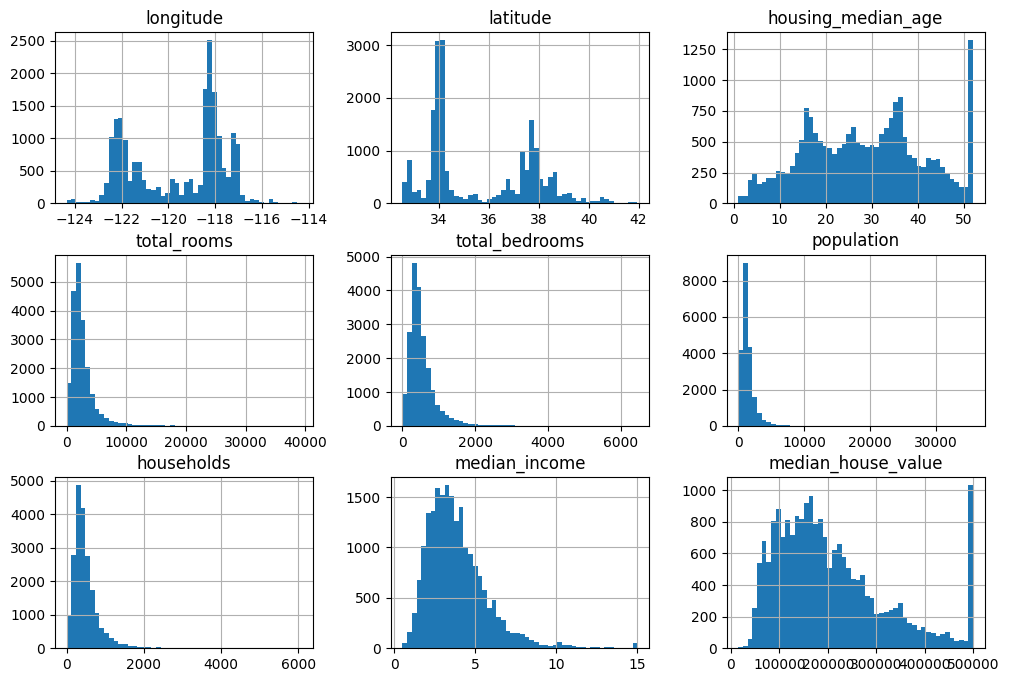

In [7]:
#Generuje wykresy dla atrybutów numerycznych
import matplotlib.pyplot as plt

data.hist(bins = 50, figsize = (12, 8))
plt.show()

Dzielenie zbioru na treningowy oraz testowy przy pomocy biblioteki scikit-learn

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

In [9]:
#Dodanie kolumny, która kategoryzuje według mediany dochodu
data['income_cat'] = pd.cut(data['median_income'],
                            bins = [0.,1.5,3.0,4.5,6.,np.inf],
                            labels = [1,2,3,4,5])


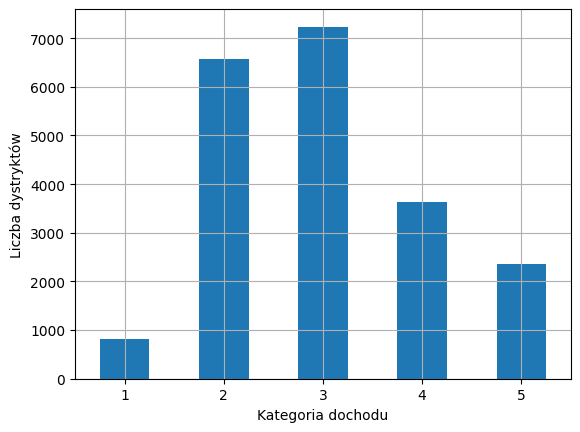

In [10]:
#Reprezentacja nowej kolumny
data['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel('Kategoria dochodu')
plt.ylabel('Liczba dystryktów')
plt.show()


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
'''Dzielenie zbioru na treningowy oraz testowy przy pomocy biblioteki scikit-learn'''
splitter = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
strat_splits = []
''' Przygotowywanie zbioru według data['income_cat], żeby w rozdzielonych próbkach był taki sam jak w pierwotnych wzorze'''
for train_index, test_index in splitter.split(data, data['income_cat']):
  #.iloc umożliwia wyszukiwanie wartosci po indeksach
  strat_train_set = data.iloc[train_index]
  strat_test_set = data.iloc[test_index]

In [12]:
#Druga opcja dzielenia z uwzglednieniem warstwowienia po income_cat
strat_train_set, strat_test_set = train_test_split(
    data, test_size = 0.2, random_state = 42, stratify = data['income_cat']
)

In [13]:
#Sprawdzenie czy warstwowienie dziala
strat_test_set['income_cat'].value_counts() / len(strat_test_set)
'''Porównanie wartości z wykresem'''

'Porównanie wartości z wykresem'

In [14]:
''' Po przygotowaniu zbioru testowego, mozna usunac kolumne '''
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis = 1, inplace = True)

In [15]:
''' Etap eksperymentowania z danymi treningowymi, warto zrobic kopie, do której wrócimy na koniec'''
data = strat_train_set.copy()

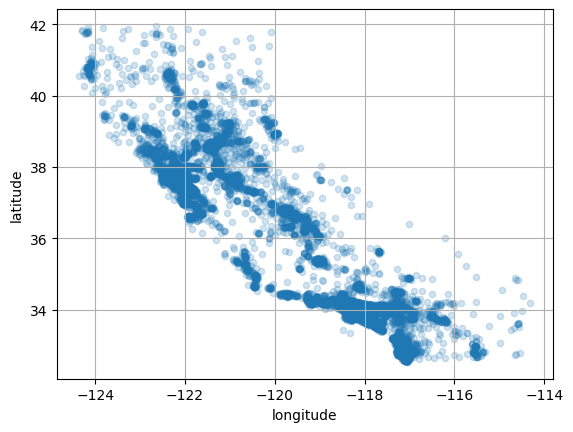

In [16]:
#Wizualizacja danych geograficznych
data.plot(x = 'longitude', y = 'latitude', kind = 'scatter', grid = True, alpha = 0.2)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

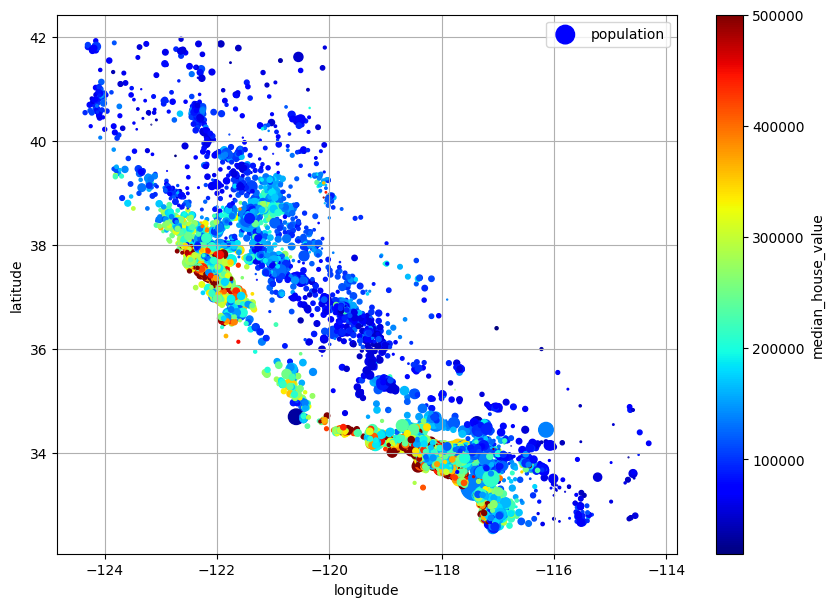

In [17]:
''' Dodanie wielkości kółek zależnych od populacji oraz kolorów zależnych od ceny '''
data.plot(x = 'longitude', y = 'latitude', kind = 'scatter', grid = True, s = data['population'] / 100, label = 'population', c = 'median_house_value',
          cmap = 'jet', colorbar = True, legend = True, sharex = False, figsize = (10,7))


Korelacja pearsona
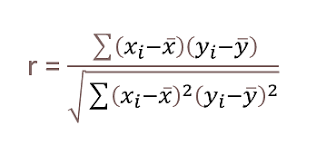

In [18]:
corr_matrix = data.corr(numeric_only=True)

In [19]:
corr_matrix['median_house_value'].sort_values(ascending = False)
'''W korelacji Pearsona, wartośći mogą osiągąć od <-1 do 1>, Im bliżej 1 to korelacja silnie dodatnia,
w przeciwnym wypadku silnie ujemna'''


'W korelacji Pearsona, wartośći mogą osiągąć od <-1 do 1>, Im bliżej 1 to korelacja silnie dodatnia,\nw przeciwnym wypadku silnie ujemna'

Graficzne sprawdzenie korelacji najlepszych kolumn (top 4)

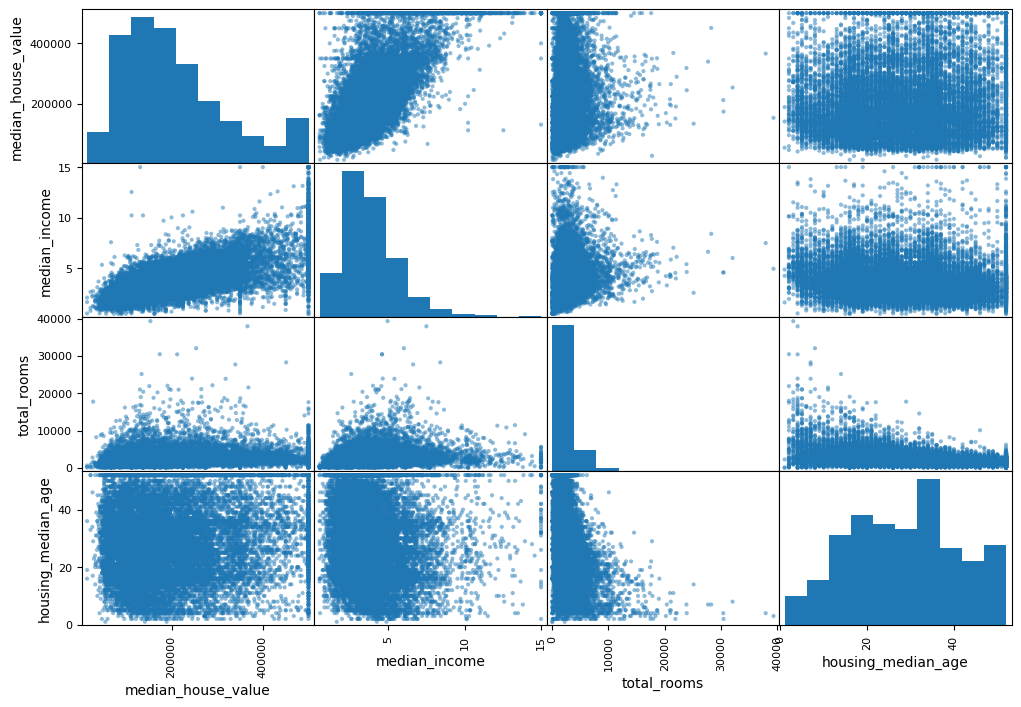

In [20]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
pd.plotting.scatter_matrix(data[attributes], figsize = (12,8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

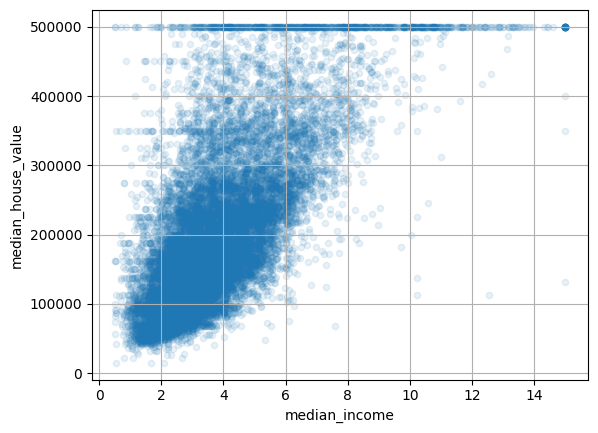

In [21]:
data.plot(x = 'median_income', y = 'median_house_value', kind = 'scatter', alpha = 0.1, grid = True)

In [22]:
#Eksperymentowanie ciag dalszy
data['pokoje_na_rodzine'] = data['total_rooms'] / data['households']
data['wspolczynnik_sypialni'] = data['total_bedrooms'] / data['total_rooms']
data['wspolczynnik_populacji'] = data['population'] / data['households']

corr_matrix = data.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
pokoje_na_rodzine,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
wspolczynnik_populacji,-0.021991
population,-0.026882
longitude,-0.047466


Pojawiła się korelacja ujemna przy współczynniku_sypialnianym, oznacza to, że
wraz z mniejsza iloscia sypialni, cena domu idzie do góry

**Preparing data for ML algorithms**

In [23]:
X_train = strat_train_set.drop('median_house_value', axis = 1)
y_train = strat_train_set['median_house_value'].copy()

**Data Cleaning**

In [24]:
median = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median, inplace = True)

/tmp/ipython-input-24-224786926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(median, inplace = True)


In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
'''SimpleImputer działa jedynie na wartościach numerycznych,
dlatego trzeba stworzyć kopie zbioru danych bez kolumny ocean_proximity'''
data_num = data.select_dtypes(include = [np.number])
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_


array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.79500000e+05,  5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [27]:
data_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.79500000e+05,  5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [28]:
X = imputer.transform(data_num)

Sprawdzanie nazw kolumn, na których był fitowany imputer

In [29]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'pokoje_na_rodzine', 'wspolczynnik_sypialni',
       'wspolczynnik_populacji'], dtype=object)

Przywrocenie nazw, bo imputer zwraca numpy lub sympy bez kolumn nazw

In [30]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index=data_num.index)

**Obsługa tekstu i atrybutów kategorialnych**

In [31]:
data_cat = data[['ocean_proximity']]
data_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [32]:
''' Przerobienie tekstu na liczbe '''

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:8]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [33]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

W tym przypadku lepiej uzyc OneHotEncoder

In [34]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)


**Feature scaling**

In [35]:
from sklearn.preprocessing import MinMaxScaler
''' StandardScaler w odróźnieniu od MinMax nie narzuca zakresu w jakim są przerobione
dane '''
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
data_num_min_max_scaled = min_max_scaler.fit_transform(data_num)

In [36]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_num_std_scaled = std_scaler.fit_transform(data_num)

In [37]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(data[['housing_median_age']], [[35]], gamma = 0.1)

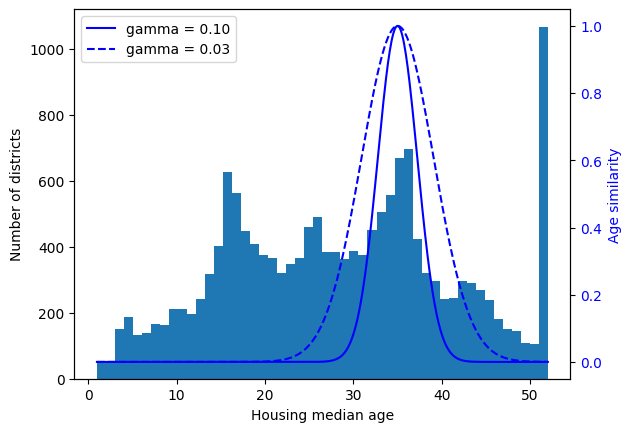

In [38]:

ages = np.linspace(data["housing_median_age"].min(),
                   data["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(data["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

*Prezentowanie jak po standaryzacji danych wyjsciowych, otrzymamy dane prawdziwe, a nie np. objete logarytmowi*

In [39]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(y_train.to_frame())

model = LinearRegression()
#X_test, y_test
model.fit(data[['median_income']], scaled_labels)
new_data = data[['median_income']].iloc[:5]

scale_predictions = model.predict(new_data)

#Odwracamy standaryzacje
predictions = target_scaler.inverse_transform(scale_predictions)
print(predictions)

[[135958.75805364]
 [309735.008975  ]
 [165232.3998617 ]
 [138162.41971241]
 [232903.1766333 ]]


In [40]:
#Latwiejszy sposob
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(), transformer = StandardScaler())
model.fit(data[['median_income']], y_train)
predictions = model.predict(new_data)
print(predictions)

[135958.75805364 309735.008975   165232.3998617  138162.41971241
 232903.1766333 ]


In [41]:
from sklearn.preprocessing import FunctionTransformer

#Można ale nie trzeba wpisywać inverse_func
log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(data[['population']])

rbf_transformer = FunctionTransformer(rbf_kernel, kw_args = dict(Y = [[35.]], gamma =0.1))
age_simil_35 = rbf_transformer.transform(data[['housing_median_age']])

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.cluster import KMeans


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [43]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(data[["latitude", "longitude"]],
                                           sample_weight=y_train)
similarities[:3].round(2)

array([[0.  , 0.31, 0.  , 0.85, 0.  , 0.  , 0.  , 0.  , 0.16, 0.49],
       [0.11, 0.  , 0.  , 0.  , 0.94, 0.  , 0.  , 0.41, 0.  , 0.  ],
       [0.11, 0.  , 0.15, 0.  , 0.  , 0.37, 0.  , 0.02, 0.  , 0.  ]])

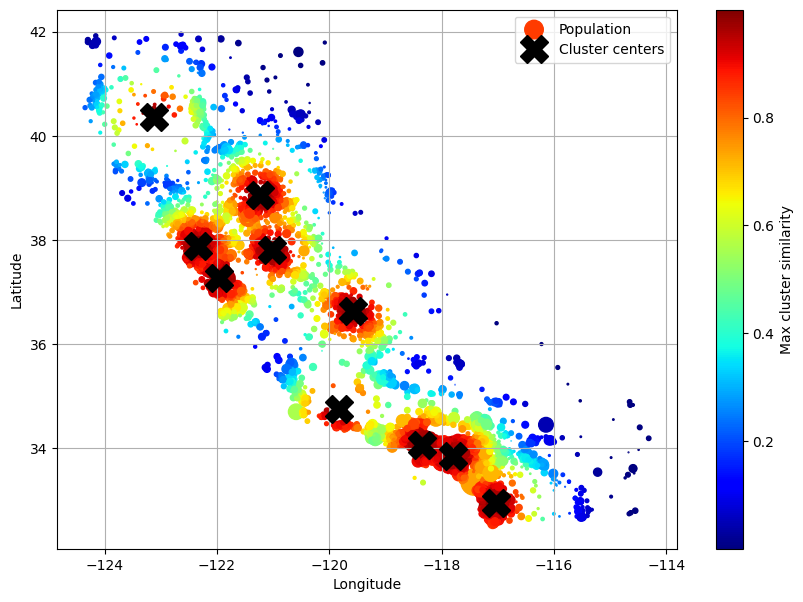

In [44]:
housing_renamed = data.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

**Potoki transformujące**

In [45]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('standardize', StandardScaler())
])

data_num_prepared = num_pipeline.fit_transform(data_num)
data_num_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89, -1.17,
         0.02, -0.12,  0.01],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29,  0.63,
         0.57, -0.91, -0.04]])

In [46]:
#Porzadna wersja
df_data_num_prepared = pd.DataFrame(data_num_prepared, columns = num_pipeline.get_feature_names_out(), index = data_num.index)
#
print(df_data_num_prepared)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655  -0.941350  1.347438            0.027564     0.584777        0.640371   
15502   1.171782 -1.192440           -1.722018     1.261467        0.781561   
2908    0.267581 -0.125972            1.220460    -0.469773       -0.545138   
14053   1.221738 -1.351474           -0.370069    -0.348652       -0.036367   
20496   0.437431 -0.635818           -0.131489     0.427179        0.272790   
...          ...       ...                 ...          ...             ...   
15174   1.251711 -1.220505           -1.165333     1.890456        1.696862   
12661  -0.921368  1.342761           -1.085806     2.468471        2.161816   
19263  -1.570794  1.310018            1.538566    -0.895802       -0.895679   
19140  -1.560803  1.249211           -1.165333     0.249005        0.112126   
19773  -1.281050  2.025674           -0.131489    -0.721836       -0.759358   

       population  households  median_income  media

In [47]:
from warnings import catch_warnings
#Transformator do kolumn kategorycznych oraz numerycznych

from sklearn.compose import ColumnTransformer

num_attributes = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
cat_attributes = ['ocean_proximity']

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes)
])


**Zamiennik, gdy nie chce wymyślać nazw dla pipelin'ów**

In [48]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [49]:
#Uzycie pipeline

data_prepared = preprocessing.fit_transform(data)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

** Tworzenie pojedyńczego potoku **

In [50]:
def column_ratio(X):
  return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
  return['ratio']
def ratio_pipeline():
  #FunctionTransformer robi transform i fit
  return make_pipeline(
      SimpleImputer(strategy = 'median'),
      FunctionTransformer(column_ratio, feature_names_out = ratio_name),
      StandardScaler()
  )

log_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median'),
    FunctionTransformer(np.log, feature_names_out = 'one-to-one'),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters = 10, gamma = 1., random_state = 42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                                     StandardScaler())
preprocessing = ColumnTransformer([
    ('współczynnik_sypialni', ratio_pipeline(),['total_bedrooms','total_rooms']),
    ('pokoje na rodzinę', ratio_pipeline(), ['population','households']),
    ('liczba_osób_na_dom', ratio_pipeline(), ['population', 'households']),
    ('log', log_pipeline, ['total_bedrooms', 'total_rooms', 'population',
                           'households','median_income']),
    ('geo', cluster_simil, ['latitude','longitude']),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object)),
],
#Wszystkie niewymienione kolumny trafiaja tutaj i dostaja standaryzacje i mediane
remainder = default_num_pipeline)

In [52]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape
preprocessing.get_feature_names_out()

array(['współczynnik_sypialni__ratio', 'pokoje na rodzinę__ratio',
       'liczba_osób_na_dom__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age', 'remainder__median_house_value',
       'remainder__pokoje_na_rodzine', 'remainder__wspolczynnik_sypialni',
       'remainder__wspolczynnik_populacji'], dtype=object)

**Select and Train a Model**

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X_train, y_train)

data_predictions = lin_reg.predict(data)
data_predictions[:5].round(-2)

array([ 72100., 279600.,  82700., 112500., 238300.])

In [56]:
y_train.iloc[:5].values
error_ratios = data_predictions[:5].round(-2) / y_train.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-0.6%, 3.3%, 124.8%, 68.3%, 14.0%


In [58]:
#Sprawdzanie mean_squared_error
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

lin_rmse = root_mean_squared_error(y_train, data_predictions)
lin_rmse

69278.83181905441

In [59]:
#Testowanie drzewa decyzyjnego

from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('współczynnik_sypialni',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function rati...
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x783b5890bf90>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [60]:
data_predictions = tree_reg.predict(data)
tree_rmse = root_mean_squared_error(y_train, data_predictions)
tree_rmse
#Cos jest nie tak. 0 bledow?

0.0

In [61]:
#Rozdzielenie zestawu uczacego na 10 podzbiorów
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, data, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)
pd.Series(tree_rmses).describe()

#tutaj patrzymy na odchylenie, ktore wynosi 55 (czyli 55k USD), troche lepiej niz w liniowym

,0
count,10.000000
mean,139.181469
std,55.597063
min,90.426006
25%,96.296179
50%,116.621163
75%,188.061675
max,222.908206


In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state = 42))
forest_rmses = -cross_val_score(forest_reg, data, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)
pd.Series(forest_rmses).describe()
#

,0
count,10.000000
mean,85.280400
std,57.569012
min,47.451643
25%,54.155586
50%,62.463456
75%,94.713673
max,237.631778


In [63]:
forest_reg.fit(data, y_train)
housing_predictions = forest_reg.predict(data)
forest_rmse = root_mean_squared_error(y_train, housing_predictions)
forest_rmse

36.674956739127325

In [64]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('współczynnik_sypialni',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x783b5890bf90>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

#Sprawdzanie najlepszego parametru

In [65]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [67]:
#Prezentowanie kombinacji parametrow oraz wynikow z uwzglednieniem 3 foldow
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43720,44634,45910,44755
6,10,4,44022,45289,45990,45100
13,15,8,44151,45197,46427,45258
9,10,6,44750,45369,46545,45555
7,10,6,44750,45369,46545,45555


In [68]:
#Metoda losowego przeszukiwania

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions = param_distribs, n_iter = 10, cv = 3, scoring = 'neg_root_mean_squared_error', random_state = 42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('współczynnik_sypialni',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(f...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x783b540ab910>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x783b540aabd0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [69]:
#Prezentowanie kombinacji parametrow oraz wynikow z uwzglednieniem 3 foldow
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41854,43841,43902,43199
8,32,7,42303,43940,43883,43375
5,42,4,42518,45129,44067,43904
0,41,16,43368,44007,44872,44082
2,23,8,43397,44165,44846,44136


#analizowanie najlepszeych modeli i ich błędów

In [71]:
final_model = rnd_search.best_estimator_
feature_importances = final_model['random_forest'].feature_importances_
feature_importances.round(2)

array([0.09, 0.04, 0.04, 0.01, 0.01, 0.01, 0.01, 0.2 , 0.01, 0.01, 0.03,
       0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.01, 0.02, 0.02, 0.01, 0.02,
       0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.02, 0.01, 0.  , 0.01, 0.  , 0.03, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

In [72]:
sorted(zip(feature_importances,
           final_model['preprocessing'].get_feature_names_out()),
       reverse = True)

[(np.float64(0.19809090775536994), 'log__median_income'),
 (np.float64(0.08679602982048852), 'współczynnik_sypialni__ratio'),
 (np.float64(0.07136460652320473), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.0375749284878748), 'liczba_osób_na_dom__ratio'),
 (np.float64(0.03557440666437034), 'pokoje na rodzinę__ratio'),
 (np.float64(0.03261771597284289), 'geo__Cluster 43 similarity'),
 (np.float64(0.026381400314998006), 'geo__Cluster 2 similarity'),
 (np.float64(0.023799856241101928), 'geo__Cluster 10 similarity'),
 (np.float64(0.022606477560137565), 'geo__Cluster 15 similarity'),
 (np.float64(0.02222466365993184), 'geo__Cluster 24 similarity'),
 (np.float64(0.019882211136956554), 'geo__Cluster 11 similarity'),
 (np.float64(0.019628945023592807), 'geo__Cluster 6 similarity'),
 (np.float64(0.018802617028721557), 'geo__Cluster 26 similarity'),
 (np.float64(0.01648545455740102), 'geo__Cluster 38 similarity'),
 (np.float64(0.015135887704007955), 'geo__Cluster 13 similarity'),
 (np.float64(0

In [74]:
#Ocena systemu za pomocą zbioru testowego

X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

40136.53681881119


In [75]:
#Sprawdzanie jak precyzyjne jest oszacowanie
#Sprawdzanie przedzialu RMSE dla przedzialu ufnosci 0.95

from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
#Nie znamy odchylenia, dlatego bierzemy t-studenta
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([38256.6311379 , 41932.24713265])

Wrzucanie do produkcji

In [76]:
import joblib

joblib.dump(final_model, 'my_california_housing_model.pkl')

['my_california_housing_model.pkl']

In [77]:
#Wgranie niestandardowych klas i funkcji uzywanych przez model

import joblib
[...] #Importuje klasy KMeans, BaseEstimator, TransformerMixin, rbf_kernel itd.

def column_ratio(X):[...]
def ratio_name(function_transformer, feature_names_in) : [...]
class ClusterSimilarity(BaseEstimator, TransformerMixin): [...]

final_model_reloaded = joblib.load('my_california_housing_model.pkl')
new_data = [...] #nowe dystrykty, dla ktorych maja pojawic sie przewidywania
predictions = final_model_reloaded.predict(new_data)

ValueError: Expected 2D array, got 1D array instead:
array=[Ellipsis].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.